# Binary Classification with an Artificial Neuron
*In which we explore the capabilities and components of the perceptron classifier.*

## How to complete this assignment
* Read through the text and code below and follow the instructions given.
* Execute all code cells.
* Complete all tasks and answer all questions.
* For open-ended questions you have some leeway regarding the length of your response, but generally 1-2 sentences is probably sufficient. Long paragraphs or one-word answers may be interpreted as cause for concern.

## Problem Statement: Nurt or Squeep?
An astrobiologist has collected data on "Nurts" and "Squeeps," two species of extra-terrestrial life recently discovered on the moon of Europa. Nurts are pictured on the left in the image below, and Squeeps are shown on the right.

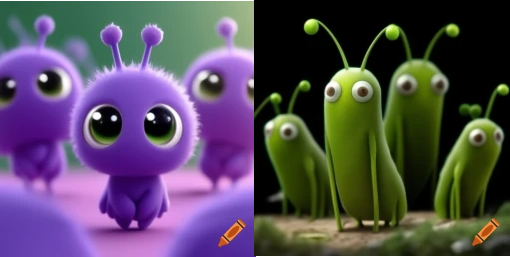

[Credit: Craiyon Image Generator]

Our Europa Roving vehicle has been collecting data on specimens from both species as it encounters them and transmitting the records back to earth for further study.

### Unfortunately...

After 100 transmissions, the rover was damaged, and could no longer collect any information about either life form except measurements of their antenna length and the diameter of their eyes.

### Fortunately...
Closer examination of the data reveals that, based on the samples we've received so far, these two features are nontheless sufficient to determine whether our rover is observing a Nurt or a Squeep. What's more, we have good reason to believe we can accomplish this goal using a fast and simple perceptron classifier.

### Task 1: Inspect the Data
Run the code cell below to visualize the features associated with our two classes of alien life, then answer the questions that follow:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

nurts = [(2.12553301, 1.0242087), (2.58048674, 1.84854442),  (1.50017156, 1.26453515),
           (1.95349886, 1.33193332),  (1.72013384, 1.61446645), (1.63850789, 1.06670318),
           (1.77939032, 1.71764701), (2.01834109, 1.18341072), (2.09515121, 1.73663192),
           (2.3082251, 1.87469795), (2.12879177, 1.12791804), (2.52782925, 1.51756998),
           (1.80667837, 1.8680002), (2.81717615, 1.51772409), (1.54108139, 1.06244182),
           (2.50570127, 1.66987051), (2.1259572, 1.82974331), (2.33803474, 1.64361139),
           (2.21058041, 2.18074344), (1.79715223, 1.7331938), (2.70111685, 2.12925239),
           (2.95239236, 1.17184338), (1.97013627, 1.17409543), (2.53848392, 2.00923911),
           (2.81458373, 1.49709605), (2.84191, 1.20669275),    (2.12756632, 2.15938573),
           (1.55858217, 1.43470732), (1.75474563, 1.93851513), (2.81721376, 1.90749748),
           (1.64752025, 2.10413261), (2.13166144, 1.77959026), (2.9368343, 1.93867804),
           (2.29974793, 1.43612293), (2.53781567, 1.33740986), (1.97327345, 2.11985777),
           (2.52975139, 1.53511399), (2.75193851, 2.20605006), (1.52743242, 1.82930187),
           (2.62521647, 1.77711965), (2.98329163, 1.14343247), (2.62224848, 2.18686157),
           (1.92066599, 1.56239017), (2.68391899, 1.72298702), (1.65483901, 1.510171),
           (2.17184029, 1.29628373), (2.86289325, 2.1292244), (1.94042122, 1.71709936),
           (1.93166301, 1.00358791), (1.69504286, 1.77143114)]

squeeps =   [(0.90830613, 2.21592284), (1.15882263, 4.90182899), (1.60742762, 3.70430139),
           (0.9465872, 2.6098797), (1.63566894, 2.75697723), (1.27920014, 4.23147756),
           (0.51977655, 2.58628844), (1.66179654, 3.74407678), (1.36362115, 4.91005997),
           (1.74665356, 4.5404864), (0.71542564, 2.71954328), (0.67141969, 3.48130914),
           (1.66574433, 3.85986716), (1.3710227, 4.4869427), (0.58250022, 2.47037418),
           (1.44432882, 2.05572861), (1.44234524, 2.21006643), (1.65378067, 3.45903533),
           (1.38940595, 3.81898838), (0.6553387, 3.70655431), (0.52485017, 2.95208723),
           (0.53276373, 4.96584846), (0.53538311, 3.73923566), (0.80776383, 3.14042352),
           (1.57503494, 3.65284466), (1.17353883, 4.23600329), (1.19102747, 4.00769868),
           (1.55253862, 2.79475867), (0.65521664, 2.1990045), (0.8489796, 3.11025259),
           (1.23219909, 3.88915252), (1.71199469, 2.63052203), (1.20128777, 4.25826666),
           (0.52330911, 2.19960944), (1.50079084, 2.7809453), (0.79121784, 4.41426369),
           (1.50888149, 2.58030285), (0.98482581, 3.91838264), (1.57942732, 3.57401093),
           (1.43390205, 4.77442391), (1.19530029, 2.78989031), (0.67056903, 2.19788327),
           (0.57489711, 4.20519789), (0.65167932, 4.31653409), (0.55568985, 4.72344756),
           (0.63436766, 4.79591621), (0.78213667, 2.04185472), (1.39123623, 2.70308626),
           (1.19964623, 3.85033507), (0.51569498, 4.84704896)]

nurts = np.array(nurts)
squeeps = np.array(squeeps)

nurt_eyes = nurts[:,0]
nurt_antenna = nurts[:,1]

squeep_eyes = squeeps[:,0]
squeep_antenna = squeeps[:,1]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(squeep_eyes, squeep_antenna, label='Squeeps', marker='x', c='green', s=50)
plt.scatter(nurt_eyes, nurt_antenna, label='Nurts', marker='o', c='purple', s=50)

plt.xlabel('Diameter of Eyes (cm)')
plt.ylabel('Length of Antennae (cm)')
plt.title('Extra-terrestrial Observations')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()
plt.grid(True)
plt.show()


After running the code above and inspecting the output, answer the following questions in the cell below:
* Q1. What visual indication do we have that the two features above will be sufficient to correctly classify our data?
* Q2. What about the data suggests that a perceptron will work for this scenario?

### Task 2: Build Your Perceptron
One way to verify that a perceptron is well-suited to this task is build one and try it out. To do this, we'll use the Perceptron implementation provided in your textbook. Run the next cell to define a Perceptron class.

In [ ]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

Now that we have a general class for creating perceptrons, run the code below (adapted from your textbook) to instantiate a particular perceptron object and train it on the data we want to classify:

In [ ]:
y = np.array([0]*50 + [1]*50)
X = np.concatenate((nurts, squeeps))

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.yticks(np.arange(0, max(ppn.errors_) + 1, 1))

plt.show()


Review the code and figure shown above to answer the following questions in the cell below:
* Q3. How many times did the fit method iterate through the entire set of training data?
* Q4. How many of these iterations were necessary to improve the performance of the classifier?
* Q5. What is the average loss (error) of the trained perceptron over the entire set of training data?

### Task 3: A Closer Look at Our Perceptron
The diagram below shows a typical illustration of a perceptron model. The questions that follow ask you to relate this *general* diagram to the *particular* perceptron we trained to classify Nurts and Squeeps. In some cases, you may find it helpful to write and run some code of your own as you write your responses. You can use the empty code cell provided below the digram for this purpose.

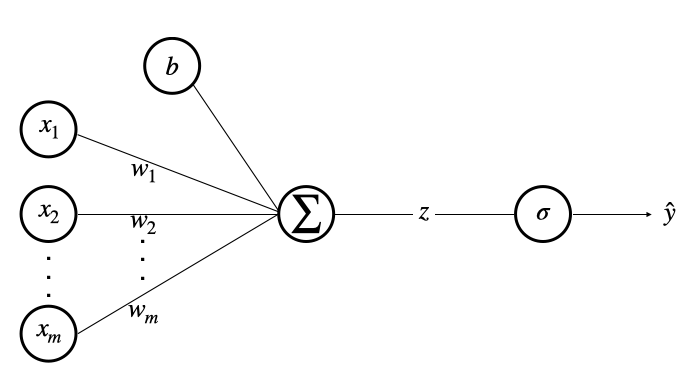

In [ ]:
# Use this code cell as needed to help you answer the questions below.

Referring to the diagram above:
* Q6. What is the value of $m$ for the perceptron we created?
* Q7. List the specific values of $w_1, w_2...w_m$ that are used by our trained perceptron.
* Q8. What is the value of $b$ our perceptron uses?

### Task 4: A New Observation
Imagine our rover encounters a new creature and we want to know whether it is a Nurt or a Squeep. The rover records that the creature's antennae are 3 cm long, and the diameter of its eyes is 2 cm wide.

* Q9. Given your answers to questions 6-8 above, write out an expression to calculate $z$ for the new creature, then simplify it to a single scalar value.
* Q10. What is the output of $\sigma(z)$?
* Q11. Is the creature a Nurt or a Squeep?


### Task 5: Visualizing $z$
Run the code below and examine the resulting figure.

In [ ]:
net_inputs = ppn.net_input(X)

plt.figure(figsize=(10, 2))
plt.plot(net_inputs, np.zeros_like(net_inputs), 'o', c='blue')

plt.xlabel('z')
plt.yticks([])
plt.title('Net Input for Training Samples')

plt.show()


* Q12. Which points on the graph above correspond to Nurts? Briefly explain your reasoning.

### Task 6: $z$ and the Decision Boundary
We can use our trained perceptron to draw a line on the original plot of our data that represents our decision boundary. Run the code below to see what this looks like:

In [ ]:
# Decision boundary
x_vals = np.array([0,5])
y_vals = -(ppn.w_[0] * x_vals + ppn.b_) / ppn.w_[1]

plt.figure(figsize=(8, 6))
plt.scatter(squeep_eyes, squeep_antenna, label='Squeeps', marker='x', c='green', s=50)
plt.scatter(nurt_eyes, nurt_antenna, label='Nurts', marker='o', c='purple', s=50)
# plot a line through the points given by corresponding x_vals and y_vals
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.xlabel('Diameter of Eyes (cm)')
plt.ylabel('Length of Antennae (cm)')
plt.title('Extra-terrestrial Observations')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()
plt.grid(True)
plt.show()


Since the decision boundary is a line, it can be expressed in the form $y = mx + b$, where $m$ is the slope and $b$ is the y-intercept. Review the code above and think through how this equation relates to the expression we are using to generate the line.

* Q13. What are $m$ and $b$, expressed in terms of the weights and bias learned by our perceptron?
* Q14. Why does this expression give us the decision boundary? (Hint: what does the line represent in terms of the value of $z$?)

## Submitting your Notebook
The process for submitting this assignment is the same as assignment 1. For convenience, here is a reminder:

### Step 1: Check for completion
**This assignment will be graded based on completion. To get credit, it must be complete!** This means you must:
* Run all the code cells.
* Complete all the tasks and exercises.
* Answer all the questions.

Take a moment now to look back over your notebook and check that it's ready to submit.


### Step 2: Move your notebook to your assignment submission folder
You submit your notebook by moving it to your assignment submission folder, a Google Drive folder that has been shared with you for this purpose.
* The name of your assignment submission folder is `csci375-submit-here-<your_obieID>`, where `<your_obieID>` should be replaced with your personal ObieID.
* For example, if your ObieID is `mzucker`, your assignment submission folder would be called `csci375-submit-here-mzucker`.
* You should be able to find this folder by searching in Google Drive, or looking under the "Shared with me" section.
* To avoid chaos, first please double check that you have renamed your notebook file to append your obieID to the filename.
* When you are ready to submit, locate your copy of this file in your Google Drive, and move it into your assignment submission folder.

Note that you will still be able to edit your file even after it is shared. However, after the submission deadline has passed a copy of your submission will be made for grading, and will not be able to receive any further edits.

Huzzah!

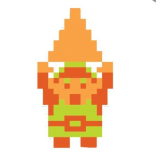